In [55]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline


legos = pd.read_csv('lego_out.csv')


In [56]:
legos['error_check'] = np.isfinite(legos.year)
legos = legos[legos['error_check'] == True]
legos = legos[legos.color_name != "[No Color]"]

#REMOVED 699 ROWS WITH NO YEAR, converting remaining to Int
legos.year = legos.year.astype('int')

In [57]:
#what are the top colors over all?
top_10 = legos.groupby('color_name').agg('count').sort_values('part_num', ascending = False)['part_num'].head(20)
#bottom_10 =legos.groupby('color_name').agg('count').sort_values('part_num', ascending = False)['part_num'].tail(10)
top_10 = top_10*100/len(legos['color_name'])
new = pd.DataFrame(top_10)
new.reset_index()
new.columns = ['Percent Of Total']
new.head()

,Percent Of Total
color_name,
Black,19.94
White,11.50
Light Bluish Gray,9.58
Red,8.66
Dark Bluish Gray,7.61


In [63]:
def get_top_colors(df):
    return df['color_name'].value_counts().head(3)

def get_red(df):
    '''verify when red stops being in every top 3'''
    return 'Yellow' in get_top_colors(df)
#legos[legos.year<1988].groupby('year').apply(get_top_colors)

legos[legos.theme_name == "Duplo"].groupby('year').apply(get_top_colors)

year              
1977  Yellow            6
      Blue              4
      Green             2
1984  Yellow            7
      Blue              5
      Red               4
1987  Red               2
      Yellow            1
1989  Blue              2
      Yellow            1
1990  Green             1
1991  White             3
      Pink              3
1992  Green             1
1993  Dark Gray         2
1997  Yellow            7
      Green             7
      Red               6
1998  Blue              5
      Green             5
      Yellow            4
1999  Yellow            3
      Red               2
      Purple            1
2000  Yellow           15
      Red              14
      Dark Gray         7
2001  Red              10
      Green             7
      Black             6
                     ... 
2008  Red              20
      Yellow           19
      Blue             11
2009  Red              14
      White            14
      Yellow           11
2010  Red          

In [114]:
#get total parts per year and return as percent

#Uncommon colors - look at top colors for each year not in top 10 overall
less_common = legos
for item in top_10.head(5).index:
    less_common = less_common[less_common['color_name'] != item]
    
#less_common.groupby('year').apply(get_top_colors)

color_name
Black               19.86
White               11.46
Light Bluish Gray    9.54
Red                  8.63
Dark Bluish Gray     7.58
Yellow               6.69
Blue                 5.14
Light Gray           4.37
Reddish Brown        2.44
Tan                  2.36
Green                2.04
Trans-Clear          1.32
Dark Gray            1.31
Orange               1.06
Trans-Red            0.99
Lime                 0.85
Dark Red             0.76
Trans-Light Blue     0.71
Pearl Gold           0.70
Flat Silver          0.66
Name: part_num, dtype: float64

In [102]:
legos[legos.year<1988].groupby('year').apply(get_top_colors)

year               
1950  Red                 8
      Yellow              8
      White               8
      Blue                6
      Green               6
      Medium Blue         2
      Light Green         2
      Trans-Clear         2
      Bright Green        2
      Medium Orange       2
1953  White               6
      Red                 5
      Green               3
      Yellow              3
      Blue                1
1954  Red                35
      White              28
      Yellow             16
      Blue               13
      Green               4
      Trans-Clear         1
      Light Gray          1
1955  White              93
      Red                53
      Yellow             19
      Blue               18
      Green               6
      Trans-Clear         3
      [No Color]          1
1956  White              52
                       ... 
1985  Red               995
      Black             987
      Blue              657
      Yellow            600


In [6]:
legos.describe()


,inventory_id,color_id,quantity,part_cat_id,ivty_version,set_quantity,year,theme_id,set_parts_count,theme_parent_id
count,"579,552.00","579,552.00","579,552.00","579,447.00","579,552.00","78,369.00","579,552.00","579,552.00","579,552.00","371,970.00"
mean,"8,605.47",78.56,3.32,20.18,1.00,1.01,"2,005.73",273.93,507.15,204.66
std,"4,958.89",622.61,8.23,13.63,0.04,0.09,10.81,190.34,606.51,168.31
min,1.00,-1.00,1.00,1.00,1.00,1.00,"1,950.00",1.00,1.00,1.00
25%,"4,352.00",1.00,1.00,11.00,1.00,1.00,"2,001.00",100.00,134.00,52.00
50%,"8,634.00",15.00,2.00,14.00,1.00,1.00,"2,009.00",236.00,328.00,158.00
75%,"12,796.00",71.00,4.00,27.00,1.00,1.00,"2,014.00",464.00,666.00,318.00
max,"18,708.00","9,999.00","1,440.00",57.00,5.00,3.00,"2,017.00",614.00,"5,922.00",580.00


In [3]:
import re
pattern = re.compile(".*Pink.*")
legos['pink'] = [True if pattern.match(item) else False for item in legos['color_name']]
pink_legos = legos[legos['pink']==True]
pink_legos.shape

#We have 4296 pink lego pieces to analyze

pink_legos.describe()


,inventory_id,color_id,quantity,part_cat_id,ivty_version,set_quantity,year,theme_id,set_parts_count,theme_parent_id
count,"4,296.00","4,296.00","4,296.00","4,293.00","4,296.00",481.00,"4,296.00","4,296.00","4,296.00","1,710.00"
mean,"8,506.53",28.60,2.44,23.08,1.00,1.00,"2,009.55",409.79,304.38,282.55
std,"4,903.81",38.28,4.96,13.14,0.04,0.00,6.82,152.42,499.47,134.97
min,3.00,5.00,1.00,2.00,1.00,1.00,"1,991.00",22.00,1.00,22.00
25%,"4,272.50",5.00,1.00,13.00,1.00,1.00,"2,004.00",319.00,60.00,217.00
50%,"8,175.00",29.00,1.00,21.00,1.00,1.00,"2,013.00",494.00,140.00,318.00
75%,"12,917.00",29.00,2.00,28.00,1.00,1.00,"2,015.00",500.00,324.00,318.00
max,"18,645.00",351.00,200.00,57.00,2.00,1.00,"2,017.00",611.00,"5,200.00",535.00


In [60]:
import re
pattern = re.compile(".*Mind.*")
legos['salmon'] = [True if pattern.match(item) else False for item in legos['theme_name']]
legos[legos['salmon']==True]


#We have 4296 pink lego pieces to analyze



,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,set_name,year,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,error_check,salmon
69268,2109,2357,70,7,f,Reddish Brown,582A12,f,Brick 2 x 2 Corner,11.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks,True,True
69269,2109,2419,72,6,f,Dark Bluish Gray,6C6E68,f,Wedge Plate 3 x 6 Cut Corners,49.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Plates Angled,True,True
69270,2109,2456,70,2,f,Reddish Brown,582A12,f,Brick 2 x 6,11.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks,True,True
69271,2109,2456,72,16,f,Dark Bluish Gray,6C6E68,f,Brick 2 x 6,11.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks,True,True
69272,2109,2462,71,20,f,Light Bluish Gray,A0A5A9,f,Facet 3 x 3,6.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks Wedged,True,True
69273,2109,2465,4,1,f,Red,C91A09,f,Brick 1 x 16,11.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks,True,True
69274,2109,2730,71,4,f,Light Bluish Gray,A0A5A9,f,Technic Brick 1 x 10 [9 Holes],8.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Technic Bricks,True,True
69275,2109,2780,0,41,f,Black,05131D,f,Technic Pin with Friction Ridges Lengthwise an...,53.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Technic Pins,True,True
69276,2109,3001,4,4,f,Red,C91A09,f,Brick 2 x 4,11.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks,True,True
69277,2109,3001,14,1,f,Yellow,F2CD37,f,Brick 2 x 4,11.00,...,Green City,2011,518.00,"1,356.00",Mindstorms,507.00,Educational and Dacta,Bricks,True,True


In [6]:
legos[legos.theme_name =="Fairy-Tale"].describe()


,inventory_id,color_id,quantity,part_cat_id,ivty_version,set_quantity,year,theme_id,set_parts_count,theme_parent_id
count,"1,720.00","1,720.00","1,720.00","1,718.00","1,720.00",326.00,"1,720.00","1,720.00","1,720.00","1,720.00"
mean,"6,116.71",152.47,1.72,23.86,1.00,1.00,"2,002.68",319.00,106.88,318.00
std,"4,922.42",988.06,1.38,10.44,0.00,0.00,2.61,0.00,65.32,0.00
min,80.00,-1.00,1.00,1.00,1.00,1.00,"1,999.00",319.00,4.00,318.00
25%,"2,469.00",13.00,1.00,14.00,1.00,1.00,"2,000.00",319.00,50.00,318.00
50%,"4,088.00",18.00,1.00,27.00,1.00,1.00,"2,003.00",319.00,84.00,318.00
75%,"10,471.00",47.00,2.00,31.75,1.00,1.00,"2,005.00",319.00,158.00,318.00
max,"16,123.00","9,999.00",14.00,53.00,1.00,1.00,"2,007.00",319.00,231.00,318.00


In [14]:
legos['theme_name'].head()

0    Gravity Games
1    Gravity Games
2    Gravity Games
3    Gravity Games
4          Friends
Name: theme_name, dtype: object

In [4]:
import re
pattern = re.compile(".*Star Wars.*")
legos['star_wars'] = [True if pattern.match(str(item)) else False for item in legos['theme_name']]
starwars_legos = legos[legos['star_wars']==True]
starwars_legos.shape
#starwars_legos.shape[0]/legos.shape[0]


(52680, 24)

In [5]:
unique_swthemes = starwars_legos.theme_name.unique()
len(unique_swthemes)
legos['theme_2'] = ["Star Wars" if item in unique_swthemes else item for item in legos.theme_name]


12

In [9]:
pink_legos['color_name'].unique()

array(['Bright Pink', 'Dark Pink', 'Glitter Trans-Dark Pink',
       'Trans-Dark Pink', 'Pink', 'Trans-Pink', 'Chrome Pink',
       'Light Pink', 'Medium Dark Pink'], dtype=object)

In [137]:
pink_legos.groupby('color_name').agg('count').sort_values('part_num', ascending = False)['part_num']
#Dark Pink is the most commonly used, followed by Bright Pink. 

color_name
Dark Pink                  1536
Bright Pink                1423
Trans-Dark Pink             814
Pink                        336
Trans-Pink                  102
Glitter Trans-Dark Pink      44
Chrome Pink                  24
Light Pink                   11
Medium Dark Pink              6
Name: part_num, dtype: int64

In [13]:
pink_legos.groupby('year').apply(get_top_colors)

year                         
1991  Pink                         3
1992  Pink                        39
1993  Pink                        30
      Medium Dark Pink             6
1994  Pink                        40
      Dark Pink                   38
      Light Pink                   1
1995  Pink                        39
      Dark Pink                   22
      Light Pink                   2
1996  Dark Pink                   56
      Pink                        33
      Light Pink                   1
1997  Dark Pink                   34
      Pink                        23
1998  Dark Pink                   47
      Pink                         4
1999  Dark Pink                   45
      Pink                        23
      Glitter Trans-Dark Pink      3
2000  Dark Pink                   16
      Trans-Dark Pink             15
      Pink                         8
2001  Trans-Dark Pink             37
      Dark Pink                   27
      Glitter Trans-Dark Pink      2
2002  Da

In [11]:
pink_legos.head()

NameError: name 'pink_legos' is not defined

In [32]:
top_themes_pink = pink_legos.groupby('theme_name').agg('count').sort_values('part_num', ascending = False)['part_num'].head(10)
top_themes_overall = legos.groupby('theme_2').agg('count').sort_values('part_num', ascending = False)['part_num'].head(10)


Text(0.5,0,'Theme Name')

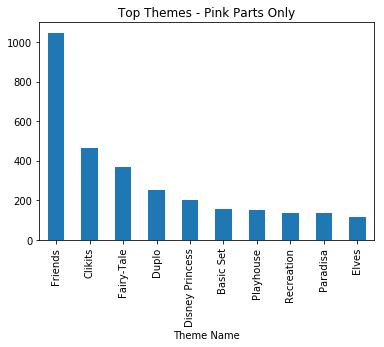

In [34]:
top_themes_pink.head()
top_themes_pink.plot(kind = 'bar')
plt.title('Top Themes - Pink Parts Only')
plt.xlabel("Theme Name")

In [2]:
def get_top_themes(df):
    return df['theme_name'].value_counts().head(5)
pink_themes_year = pink_legos.groupby('year').apply(get_top_themes)
pink_themes_year

NameError: name 'pink_legos' is not defined

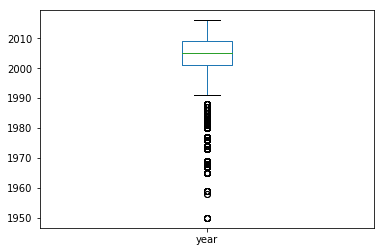

In [34]:
a.plot.box(by = 'theme_2')

Text(0.5,1,'Themes with Most Pink Pieces - Years Released')

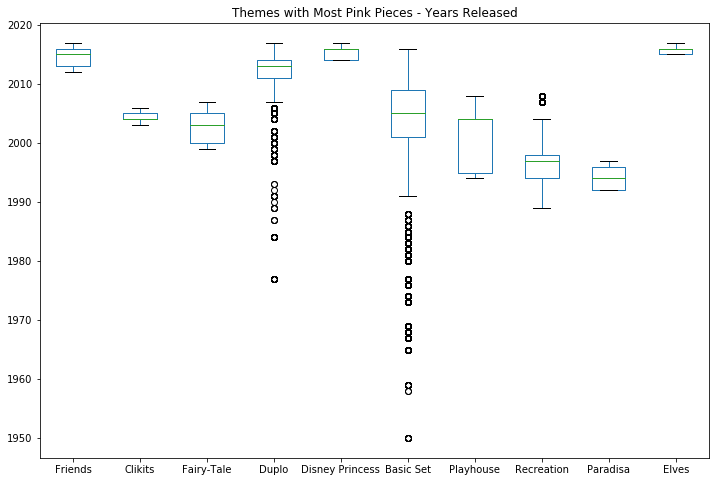

In [68]:
df_pink.plot(kind = 'box', figsize = (12, 8))
plt.title("Themes with Most Pink Pieces - Years Released")

In [65]:
df_pink = pd.DataFrame([legos[legos.theme_2==theme]['year'] for theme in top_themes_pink.index]).T
df_pink.columns = [theme for theme in top_themes_pink.index]


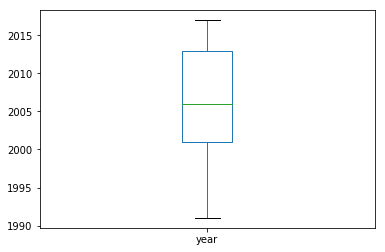

In [62]:
a.plot(kind = 'box')

In [37]:
df = pd.DataFrame([legos[legos.theme_2==theme]['year'] for theme in top_themes_overall.index]).T


In [29]:
top_legos = legos[['year', 'theme_2']].drop_duplicates()
a = pd.concat([top_legos[top_legos.theme_2 == item] for item in top_themes_overall.index])

In [42]:
df.columns = [item for item in top_themes_overall.index]

Text(0.5,1,'Top 10 Themes - Years Active')

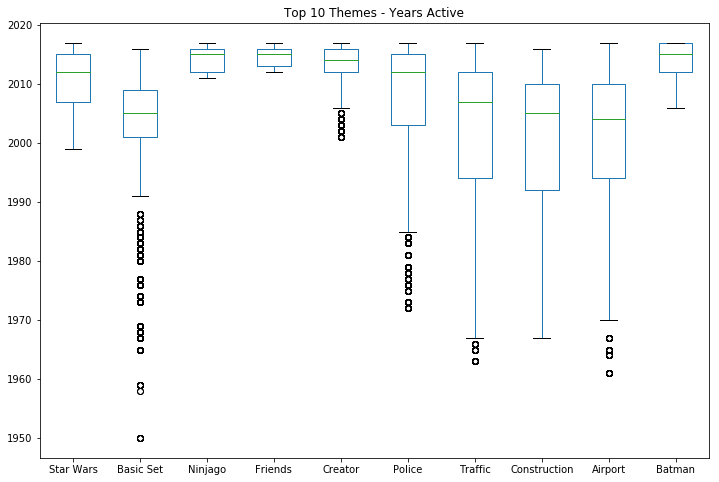

In [45]:
df.plot(kind = 'box', figsize = (12, 8))
plt.title("Top 10 Themes - Years Active")

In [ ]:
pink_vt = ppty_pink.join(ppty)
pink_vt['Rate_Pink'] = pink_vt['Pink_Parts_Per_Set_Year']/pink_vt['Parts_Per_Set_Year']
pink_vt.sort_values('Rate_Pink', ascending = False)

In [ ]:
ppt = pd.DataFrame(legos.groupby('theme_name').agg('count')['part_num'])
ppt.columns = ['Parts_Per_Set']
ppt_pink = pd.DataFrame(pink_legos.groupby('theme_name').agg('count')['part_num'])
ppt_pink.columns = ['Pink_Parts_Per_Theme']
pink_vt = ppt_pink.join(ppt)
pink_vt['Rate_Pink'] = pink_vt['Pink_Parts_Per_Theme']/pink_vt['Parts_Per_Theme']
pink_vt.sort_values('Rate_Pink', ascending = False)

In [140]:
pink_per_year = pink_legos.groupby('year').agg('count')['part_num']
legos_per_year = legos.groupby('year').agg('count')['part_num']

pink_per_year_df = pink_legos.groupby('year').agg('count')
legos_per_year_df = legos.groupby('year').agg('count')

In [49]:
legos[legos.theme_name == "Duplo"][legos.year == 1990]

C:\Users\Rachael Burns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,error_check,star_wars,theme_2,pink
63736,1913,2218c01,2,1,f,Green,237841,f,Duplo Car with 2 x 2 Studs and Yellow Base,4.00,...,504.00,1.00,Duplo,nan,NaN,"Duplo, Quatro and Primo",True,False,Duplo,False


In [48]:
legos[legos.theme_name == "Duplo"].groupby('year').agg('count')

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,error_check,star_wars,theme_2,pink
year,,,,,,,,,,,,,,,,,,,,,
1977,16,16,16,16,16,16,16,16,16,16,...,16,16,16,0,0,16,16,16,16,16
1984,23,23,23,23,23,23,23,23,23,23,...,23,23,23,0,0,23,23,23,23,23
1987,3,3,3,3,3,3,3,3,3,3,...,3,3,3,0,0,3,3,3,3,3
1989,4,4,4,4,4,4,4,4,4,4,...,4,4,4,0,0,4,4,4,4,4
1990,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
1991,7,7,7,7,7,7,7,7,7,7,...,7,7,7,0,0,7,7,7,7,7
1992,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,1,1
1993,2,2,2,2,2,2,2,2,2,2,...,2,2,2,0,0,2,2,2,2,2
1997,29,29,29,29,29,29,29,29,29,29,...,29,29,29,0,0,29,29,29,29,29


In [145]:
legos.groupby('year').agg('count').sort_values('part_num', ascending = False)


,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,error_check,pink,star wars,star_wars
year,,,,,,,,,,,,,,,,,,,,,
2016,49904,49904,49904,49904,49904,49904,49904,49904,49901,49901,...,49904,49904,49904,17860,17860,49901,49904,49904,49904,49904
2015,48301,48301,48301,48301,48301,48301,48301,48301,48301,48301,...,48301,48301,48301,21277,21277,48301,48301,48301,48301,48301
2014,41431,41431,41431,41431,41431,41431,41431,41431,41431,41431,...,41431,41431,41431,17760,17760,41431,41431,41431,41431,41431
2013,34680,34680,34680,34680,34680,34680,34680,34680,34679,34679,...,34680,34680,34680,19694,19694,34679,34680,34680,34680,34680
2012,31209,31209,31209,31209,31209,31209,31209,31209,31209,31209,...,31209,31209,31209,16751,16751,31209,31209,31209,31209,31209
2017,27282,27282,27282,27282,27282,27282,27282,27282,27281,27281,...,27282,27282,27282,10704,10704,27281,27282,27282,27282,27282
2011,25073,25073,25073,25073,25073,25073,25073,25073,25072,25072,...,25073,25073,25073,12532,12532,25072,25073,25073,25073,25073
2010,24335,24335,24335,24335,24335,24335,24335,24335,24335,24335,...,24335,24335,24335,15375,15375,24335,24335,24335,24335,24335
2009,22609,22609,22609,22609,22609,22609,22609,22609,22609,22609,...,22609,22609,22609,17643,17643,22609,22609,22609,22609,22609


In [58]:
pink_lego_themes = []

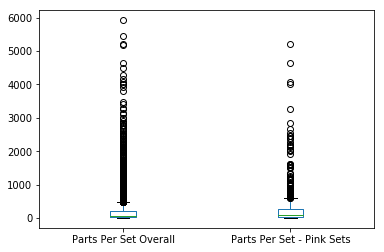

In [59]:
df.plot(kind = 'box')

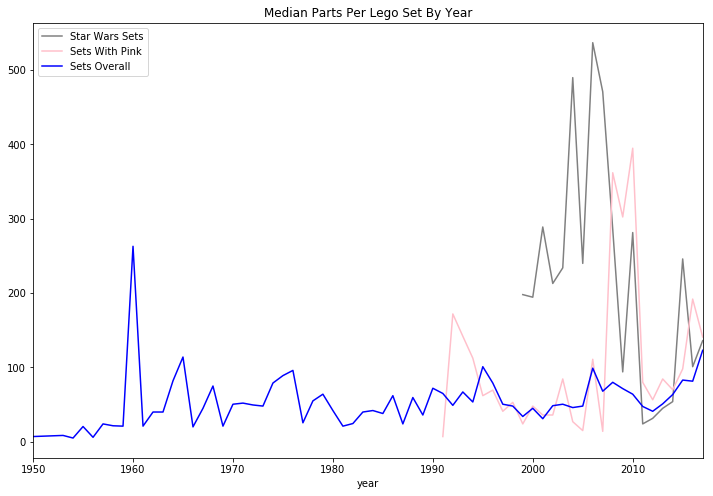

In [20]:

for dataframe, color in [(starwars_legos, 'gray'), (pink_legos,'pink'), (legos, 'blue')]:
    df = dataframe.groupby(['year', 'set_name']).agg('median')
    df.groupby('year').agg('median')['set_parts_count'].plot(style = color, figsize = (12, 8))
plt.title("Median Parts Per Lego Set By Year")
plt.legend(labels = ["Star Wars Sets", "Sets With Pink", "Sets Overall"])

In [17]:
for texture in ["Milky", "Glitter", "Trans", "Chrome"]:
    pattern = re.compile(".*" + texture + ".*")
    legos[texture] = [True if pattern.match(str(item)) else False for item in legos['theme_name']]
    legos[legos[texture]==True].groupby('year')



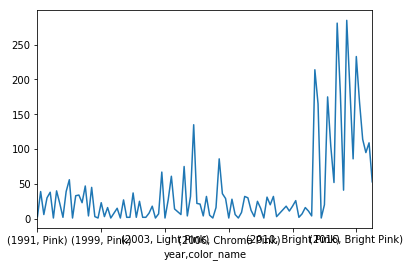

In [21]:
pink_legos.groupby(['year', 'color_name']).agg('count')['part_num'].plot()

Text(0.5,0,'Year')

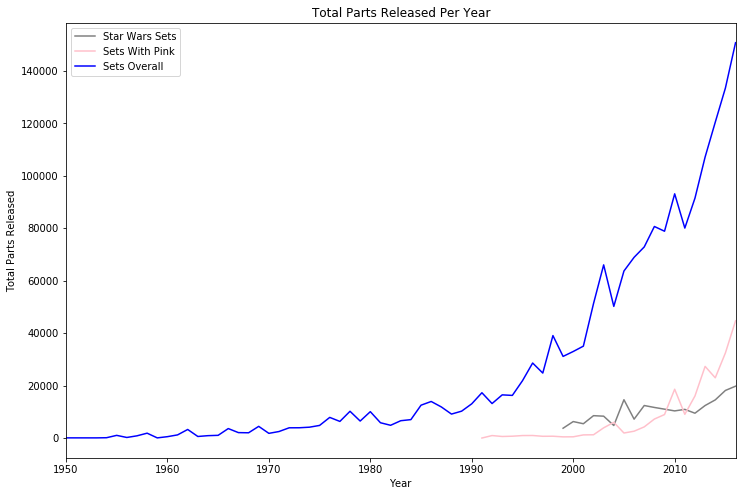

In [46]:

for dataframe, color in [(starwars_legos, 'gray'), (pink_legos,'pink'), (legos, 'blue')]:
    df = dataframe[dataframe.year<2017].groupby(['year', 'set_name']).agg('median')
    test = df.groupby('year').agg('sum')['set_parts_count'].plot(style = color, figsize = (12, 8))
plt.legend(labels = ["Star Wars Sets", "Sets With Pink", "Sets Overall"])
plt.title("Total Parts Released Per Year")
test.set_ylabel('Total Parts Released')
test.set_xlabel('Year')

In [27]:

for dataframe, color in [(starwars_legos, 'gray'), (pink_legos,'pink'), (legos, 'blue')]:
    df = dataframe.groupby(['year', 'set_name']).agg('median')
    df.groupby('year').agg('median')['set_parts_count'].rolling_mean(5).plot(style = color)
plt.title("Median Parts Per Set By Year")

AttributeError: 'Series' object has no attribute 'rolling_mean'

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

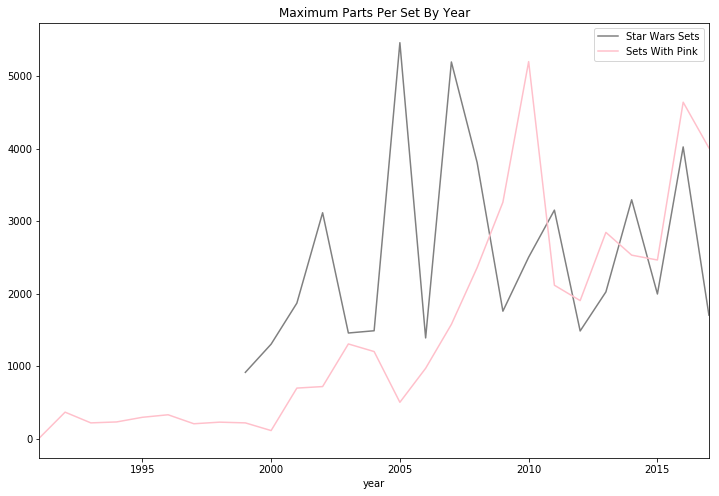

In [42]:

for dataframe, color in [(starwars_legos, 'gray'), (pink_legos,'pink')]:
    df = dataframe.groupby(['year', 'set_name']).agg('max')
    df.groupby('year').agg('max')['set_parts_count'].plot(style = color, figsize=(12,8))
plt.title("Maximum Parts Per Set By Year")
plt.legend(labels = ["Star Wars Sets", "Sets With Pink"])
plt.set_ylabel('Parts')

Text(0.5,1,'Pink Parts Per Year')

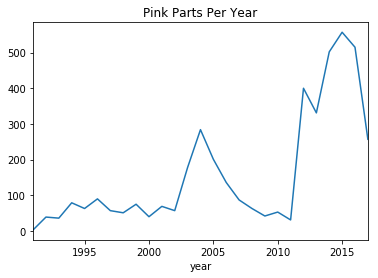

In [103]:
pink_per_year.plot() #Consider updating scale to match overall
plt.title("Pink Parts Per Year")

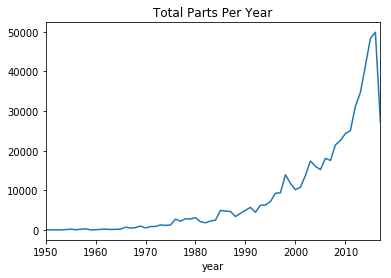

In [161]:
plt.title("Total Parts Per Year")
legos_per_year.plot()

C:\Users\Rachael Burns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Parts Per Year - Rolling 5 year Mean')

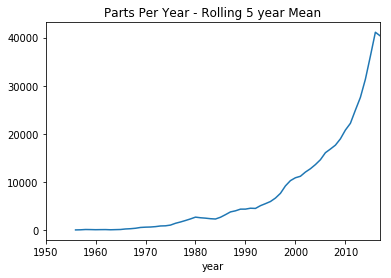

In [131]:
pd.rolling_mean(legos_per_year, 5).plot()
plt.title("Parts Per Year - Rolling 5 year Mean")

C:\Users\Rachael Burns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Pink Parts Per Year - Rolling 5 year Mean')

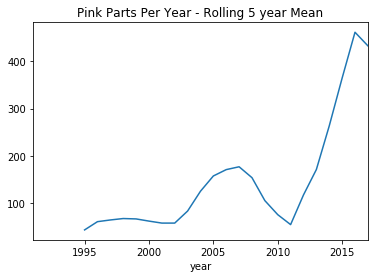

In [132]:
pd.rolling_mean(pink_per_year, 5).plot()
plt.title("Pink Parts Per Year - Rolling 5 year Mean")


In [142]:
pink_legos.groupby('year').agg('count').sort_values('part_num', ascending = False)['part_num']

year
2015    557
2016    515
2014    502
2012    400
2013    331
2004    284
2017    257
2005    201
2003    178
2006    136
1996     90
2007     87
1994     79
1999     75
2001     69
2008     63
1995     63
1997     57
2002     57
2010     53
1998     51
2009     42
2000     40
1992     39
1993     36
2011     31
1991      3
Name: part_num, dtype: int64

In [143]:
legos.groupby('year').agg('count').sort_values('part_num', ascending = False)['part_num']

#2010 has fewer pink legos than the mid-90s, but it has a total number of legos consistent with its time period.

year
2016    49904
2015    48301
2014    41431
2013    34680
2012    31209
2017    27282
2011    25073
2010    24335
2009    22609
2008    21456
2006    18091
2007    17544
2003    17422
2004    16067
2005    15214
1998    13964
2002    13747
1999    11767
2001    10813
2000    10166
1997     9375
1996     9287
1995     7179
1994     6299
1993     6248
1991     5707
1990     4961
1985     4943
1986     4772
1987     4670
        ...  
1976     2732
1984     2472
1983     2258
1977     2232
1981     2090
1982     1817
1973     1280
1975     1272
1974     1155
1969      991
1972      886
1971      860
1966      704
1968      602
1970      515
1967      479
1958      322
1965      213
1962      212
1955      193
1957      164
1964      162
1961      157
1963      130
1954       98
1956       83
1960       70
1950       46
1959       19
1953       18
Name: part_num, Length: 66, dtype: int64

In [28]:
def get_top_themes(df):
    return df['theme_name'].value_counts().head(5)
legos.groupby('year').apply(get_top_themes)

year                         
1950  Supplemental                 39
      Basic Set                     7
1953  Supplemental                 18
1954  Supplemental                 67
      Town Plan                    31
1955  Supplemental                130
      Town Plan                    50
      Mosaic                       13
1956  Town Plan                    49
      Supplemental                 34
1957  Town Plan                   139
      Supplemental                 24
      HO 1:87 Vehicles              1
1958  Supplemental                184
      Town Plan                   136
      Basic Set                     2
1959  Basic Set                    10
      Supplemental                  8
      Town Plan                     1
1960  Classic                      60
      Supplemental                 10
1961  Town Plan                    83
      Supplemental                 30
      Airport                      23
      Harbor                       20
      Classic       

In [ ]:
def get_top_sets(df):
    return df['set_name'].value_counts().head(5)

In [34]:
pink_legos[pink_legos.year>2005].groupby('year').agg('max')

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,set_num,set_quantity,set_name,theme_id,set_parts_count,theme_name,theme_parent_id,part_cat_name,error_check,pink
year,,,,,,,,,,,,,,,,,,,,,
2006,15077,x844px2,230,17,t,Trans-Pink,FECCCF,t,Treasure Chest Lid [Thick Hinge],57.00,...,7579-1,1.00,Winter Wonder Palace,504.00,969.00,SpongeBob SquarePants,318.00,Windows and Doors,True,True
2007,16421,6510,114,19,t,Trans-Dark Pink,FECCCF,t,Treasure Chest Lid [Thick Hinge],57.00,...,9764-1,1.00,Winter Royal Stables,504.00,"1,575.00",Order of the Phoenix,318.00,Windows and Doors,True,True
2008,15814,973pr1410c01,114,15,t,Trans-Dark Pink,E4ADC8,t,Window Bay 3 x 8 x 6 with Trans-Clear Glass,42.00,...,8636-1,nan,Town Plan,503.00,"2,358.00",Town Plan,501.00,Windows and Doors,True,True
2009,16231,92937,45,14,t,Trans-Dark Pink,E4ADC8,t,"Teapot / Coffeepot, Indented Base",57.00,...,DKPirates-1,1.00,Winter Toy Shop,507.00,"3,260.00",Temple of Doom,264.00,Rock,True,True
2010,15423,973pr1687,114,200,t,Trans-Dark Pink,E4ADC8,t,Torso HP Luna Fitted Jacket with Collar - 4 Bu...,57.00,...,Miami-1,1.00,Winter Village Bakery,537.00,"5,200.00",Toy Story,535.00,Tiles,True,True
2011,15222,973pr1820c01,45,81,t,Trans-Dark Pink,E4ADC8,t,Torso Female Dark Pink Top with Colorful Decor...,32.00,...,Toronto-2,1.00,Winnie the Pooh's Picnic,540.00,"2,115.00",Star Wars Episode 1,535.00,Tiles,True,True
2012,16177,99771,114,19,t,Trans-Dark Pink,E4ADC8,t,½ CIRCLE W/SLIT 8X5X3,47.00,...,OverlandPark-1,1.00,The Zombies,558.00,"1,903.00",Star Wars Episode 3,535.00,Windscreens and Fuselage,True,True
2013,16304,99784,45,80,t,Trans-Dark Pink,E4ADC8,t,Torso White Stripes with Silver Chains and Hea...,57.00,...,WishingWell-1,1.00,Wishing Well [Toys R Us Promo],577.00,"2,844.00",Teenage Mutant Ninja Turtles,535.00,Tiles Special,True,True
2014,16167,99771,45,23,t,Trans-Dark Pink,E4ADC8,t,Window 1 x 2 x 2 2/3 with Rounded Top,57.00,...,FRNDSMAGJNGLE-1,1.00,X-Wing Fighter,591.00,"2,530.00",X-Men,535.00,Windows and Doors,True,True


In [167]:
#top_themes_pink = pink_legos.groupby('theme_name').agg('count').sort_values('part_num', ascending = False)['part_num'].head(10)
top_themes_overall = legos.groupby('theme_name').agg('count').sort_values('part_num', ascending = False)['part_num'].head(10)

#top_themes_pink.plot(kind = 'bar')

In [82]:
df = legos[['theme_name', 'year']]
df.drop_duplicates()
df['top_10'] = df.theme_name in top_themes_overall

TypeError: 'Series' objects are mutable, thus they cannot be hashed

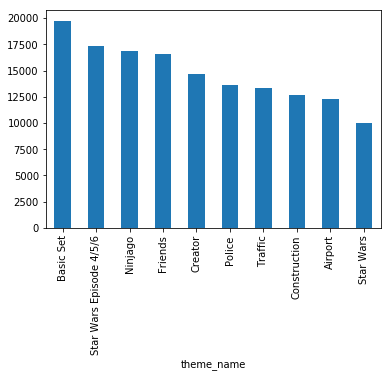

In [111]:
top_themes_overall.plot(kind = 'bar')


In [31]:
top_themes_pink.head()
top_themes_pink.plot(kind = 'bar')
plt.title('Top Themes - Pink Parts Only')

NameError: name 'top_themes_pink' is not defined

Text(0,0.5,'Number of Pieces')

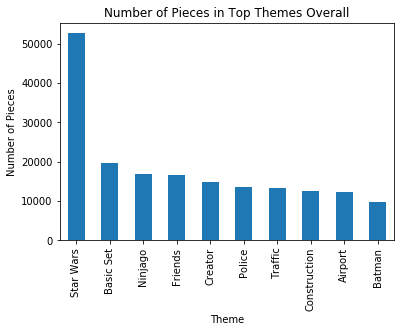

In [189]:
top_themes_overall.plot(kind = 'bar')
plt.title("Number of Pieces in Top Themes Overall")
plt.xlabel('Theme')
plt.ylabel('Number of Pieces')

In [227]:
a = legos.groupby(['year', 'theme_2']).agg('count')['part_name']
#pink_legos.groupby(['theme_name', 'year']).agg('count')['part_num']
a= a.reset_index()
a = pd.concat([a[a.theme_2 == item] for item in top_themes_overall.index])

In [37]:
legos.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,year,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,pink,star_wars,theme_2
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,Sports Promo Figure Base with Feet,27.00,...,"2,004.00",460.00,4.00,Gravity Games,458.00,Sports,Minifig Accessories,False,False,Gravity Games
1,1,48395,7,1,f,Light Gray,9BA19D,f,Sports Promo Snowboard from McDonald's Sports ...,27.00,...,"2,004.00",460.00,4.00,Gravity Games,458.00,Sports,Minifig Accessories,False,False,Gravity Games
2,1,mcsport6,25,1,f,Orange,FE8A18,f,Sports Promo Figure Head Torso Assembly McDona...,13.00,...,"2,004.00",460.00,4.00,Gravity Games,458.00,Sports,Minifigs,False,False,Gravity Games
3,1,paddle,0,1,f,Black,05131D,f,Sports Promo Paddle from McDonald's Sports Sets,27.00,...,"2,004.00",460.00,4.00,Gravity Games,458.00,Sports,Minifig Accessories,False,False,Gravity Games
4,3,11816pr0005,78,1,f,Light Flesh,F6D7B3,f,"Minifig Head Modified - Friends - Green Eyes, ...",13.00,...,"2,012.00",494.00,43.00,Friends,nan,NaN,Minifigs,False,False,Friends


In [66]:
from graphics import *

def hex_to_dec_color(hex):
    return tuple(int(hex[i:i+2], 16) for i in (0,2,4))

def make_color_story(df, x_max, y_max):
    plot_df = pd.DataFrame(df.groupby(['year', 'color_rgb']).agg('count')['color_name'])
    total_py = pd.DataFrame(df.groupby(['year']).agg('count')['color_id'])
    plot_df = plot_df.join(total_py)
    plot_df.reset_index(inplace = True)
    plot_df.columns = ['year', 'color_rgb', 'color_count', 'count_year']
    win = GraphWin("Lego_Colors__Over_Time", x_max, y_max)
    x, y = 0, 0
    years = np.sort(plot_df['year'].unique())
    try: 
        y_step = y_max/len(years)
    except:
        print("Not a valid data frame.")
        sys.exit()
    for year in years:
        year_data = plot_df[plot_df['year']==year].sort_values('color_rgb')
        for color in year_data['color_rgb']:
            color_data = year_data[year_data['color_rgb']==color]
            x_step = float(x_max * color_data['color_count'] / color_data['count_year'])
            r = Rectangle(Point(x,y), Point(x+x_step, y+y_step))
            c = hex_to_dec_color(color)
            r.setFill(color_rgb(c[0], c[1], c[2]))
            r.draw(win)
            x += x_step
        x=0
        y += y_step
    win.getMouse()
    win.close()

#make_color_story(legos[legos.theme_name == "Disney Princess"], 1000, 1000)
#make_color_story(legos[legos.theme_name =="Toy Story"], 1000, 1000)
make_color_story(legos[legos.theme_name =="Mindstorms"], 1000, 1000)
#make_color_story(pink_legos, 1000, 1000)

In [69]:
legos[legos.theme_name =="Mindstorms"][legos.year == 2016]

C:\Users\Rachael Burns\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,set_name,year,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,error_check,salmon
516733,15203,45517,0,1,f,Black,05131D,f,Transformer,24.00,...,Transformer 10V DC,2016,518.00,1.00,Mindstorms,507.00,Educational and Dacta,Other,True,True


In [25]:
legos[legos.theme_name == "Paradisa"].describe()


,inventory_id,color_id,quantity,part_cat_id,ivty_version,set_quantity,year,theme_id,set_parts_count,theme_parent_id
count,"1,253.00","1,253.00","1,253.00","1,253.00","1,253.00",0.00,"1,253.00","1,253.00","1,253.00","1,253.00"
mean,"8,245.64",45.69,1.93,19.09,1.00,nan,"1,994.06",90.00,181.69,50.00
std,"4,548.90",564.16,1.93,9.48,0.00,nan,1.94,0.00,97.33,0.00
min,491.00,0.00,1.00,1.00,1.00,nan,"1,992.00",90.00,21.00,50.00
25%,"4,249.00",7.00,1.00,13.00,1.00,nan,"1,992.00",90.00,97.00,50.00
50%,"7,298.00",14.00,1.00,14.00,1.00,nan,"1,994.00",90.00,172.00,50.00
75%,"12,287.00",15.00,2.00,27.00,1.00,nan,"1,996.00",90.00,237.00,50.00
max,"16,011.00","9,999.00",24.00,53.00,1.00,nan,"1,997.00",90.00,364.00,50.00


In [26]:
legos[legos.theme_name == "Elves"].describe()

,inventory_id,color_id,quantity,part_cat_id,ivty_version,set_quantity,year,theme_id,set_parts_count,theme_parent_id
count,"4,423.00","4,423.00","4,423.00","4,423.00","4,423.00",0.00,"4,423.00","4,423.00","4,423.00",0.00
mean,"9,690.50",123.75,2.22,19.14,1.00,nan,"2,015.89",600.00,497.74,nan
std,"4,954.23",656.07,2.25,11.91,0.00,nan,0.70,0.00,271.81,nan
min,655.00,0.00,1.00,3.00,1.00,nan,"2,015.00",600.00,1.00,nan
25%,"5,014.00",19.00,1.00,11.00,1.00,nan,"2,015.00",600.00,312.00,nan
50%,"10,418.00",52.00,1.00,15.00,1.00,nan,"2,016.00",600.00,441.00,nan
75%,"12,383.00",72.00,2.00,27.00,1.00,nan,"2,016.00",600.00,700.00,nan
max,"18,362.00","9,999.00",30.00,57.00,1.00,nan,"2,017.00",600.00,"1,013.00",nan


In [122]:
legos[legos.theme_name == "Super Heroes"].head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_istrans,part_name,part_cat_id,...,set_name,year,theme_id,set_parts_count,theme_name,theme_parent_id,parent_name,part_cat_name,error_check,pink
74099,2217,11212,29,2,f,Bright Pink,E4ADC8,f,Plate 3 x 3,14.00,...,Harley Quinn to the rescue,2016,482.00,217.00,Super Heroes,nan,NaN,Plates,True,True
74100,2217,11403pr0100,1,1,f,Blue,0055BF,f,Friends Hips and Shorts - Right Black Leggings...,13.00,...,Harley Quinn to the rescue,2016,482.00,217.00,Super Heroes,nan,NaN,Minifigs,True,False
74101,2217,11477,1,6,f,Blue,0055BF,f,Slope Curved 2 x 1 No Studs [1/2 Bow],37.00,...,Harley Quinn to the rescue,2016,482.00,217.00,Super Heroes,nan,NaN,Bricks Curved,True,False
74102,2217,11477,15,6,f,White,FFFFFF,f,Slope Curved 2 x 1 No Studs [1/2 Bow],37.00,...,Harley Quinn to the rescue,2016,482.00,217.00,Super Heroes,nan,NaN,Bricks Curved,True,False
74103,2217,14769,1,2,f,Blue,0055BF,f,Tile Round 2 x 2 with Bottom Stud Holder,19.00,...,Harley Quinn to the rescue,2016,482.00,217.00,Super Heroes,nan,NaN,Tiles,True,False


In [166]:
starwars_legos.groupby('year').apply(get_top_colors)
get_top_colors(starwars_legos)

Light Bluish Gray    10747
Black                 9303
Dark Bluish Gray      8597
Name: color_name, dtype: int64

In [35]:
ppty = pd.DataFrame(legos.groupby(['year', 'theme_name']).agg('count')[['part_num']])
ppty_pink = pd.DataFrame(pink_legos.groupby(['year', 'theme_name']).agg('count')['part_num'])
ppty_pink.columns = ['Pink_Part_Count']
ppty.columns = ['Total_Part_Count']
pink_vt = ppty_pink.join(ppty)
pink_vt['Rate_Pink'] = pink_vt['Pink_Part_Count']/pink_vt['Total_Part_Count']
pink_vt.sort_values('Rate_Pink', ascending = False, inplace = True)
pink_vt.head(10)
pink_rt_theme = pink_vt.groupby('theme_name').agg('sum')
pink_rt_theme['Rate_Pink'] = pink_rt_theme['Pink_Part_Count']/pink_rt_theme['Total_Part_Count']
pink_rt_theme.sort_values('Rate_Pink', ascending = False, inplace = True)
pink_rt_theme.head(20)

,Pink_Part_Count,Total_Part_Count,Rate_Pink
theme_name,,,
Key Chain,1,1,1.00
Clikits,464,1286,0.36
Fairy-Tale,368,1720,0.21
Hospital,36,170,0.21
Golden Land,66,323,0.20
Belville,39,207,0.19
Basic Model,16,87,0.18
Playhouse,150,938,0.16
Basic,20,141,0.14


In [73]:
legos[legos.theme_name == "Basic Set"].describe()

,inventory_id,color_id,quantity,part_cat_id,ivty_version,set_quantity,year,theme_id,set_parts_count,theme_parent_id
count,"19,753.00","19,753.00","19,753.00","19,751.00","19,753.00",682.00,"19,753.00","19,753.00","19,753.00","19,753.00"
mean,"7,603.17",38.29,4.97,12.95,1.00,1.00,"2,001.00",162.71,582.00,151.41
std,"4,792.42",411.10,7.42,8.42,0.00,0.00,12.35,189.96,381.05,195.37
min,103.00,0.00,1.00,1.00,1.00,1.00,"1,950.00",37.00,2.00,22.00
25%,"3,462.00",2.00,2.00,11.00,1.00,1.00,"2,001.00",37.00,285.00,22.00
50%,"7,422.00",7.00,2.00,11.00,1.00,1.00,"2,005.00",37.00,500.00,22.00
75%,"11,391.00",15.00,4.00,14.00,1.00,1.00,"2,009.00",366.00,709.00,365.00
max,"17,713.00","9,999.00",120.00,57.00,1.00,1.00,"2,016.00",505.00,"2,000.00",504.00
